In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Vehicle_Insurance_Fraudulent/train.csv', sep='\t')

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
4,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13420 entries, 0 to 13419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 13420 non-null  object
 1   WeekOfMonth           13420 non-null  int64 
 2   DayOfWeek             13420 non-null  object
 3   Make                  13420 non-null  object
 4   AccidentArea          13420 non-null  object
 5   DayOfWeekClaimed      13420 non-null  object
 6   MonthClaimed          13420 non-null  object
 7   WeekOfMonthClaimed    13420 non-null  int64 
 8   Sex                   13420 non-null  object
 9   MaritalStatus         13420 non-null  object
 10  Age                   13420 non-null  int64 
 11  Fault                 13420 non-null  object
 12  PolicyType            13420 non-null  object
 13  VehicleCategory       13420 non-null  object
 14  VehiclePrice          13420 non-null  object
 15  FraudFound_P          13420 non-null

In [ ]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,13420.000000,13420.000000,13420.000000,13420.000000,13420.000000,13420.000000,13420.000000,13420.000000,13420.000000
mean,2.786736,2.687481,39.885171,0.059314,7907.977198,8.517213,407.973174,2.487332,1994.900671
std,1.290897,1.262697,13.476550,0.236221,4522.640589,4.607244,44.712086,1.119070,0.814788
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3989.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7964.500000,9.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11931.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15419.000000,16.000000,700.000000,4.000000,1996.000000


In [4]:
X = df.drop(['FraudFound_P', 'PolicyNumber'], axis=1)
y = df['FraudFound_P']

In [5]:
y.mean()

0.05931445603576751

Split features into Numerical and Categorical

In [6]:
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [7]:
num.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible',
       'DriverRating', 'Year'],
      dtype='object')

In [8]:
def unique_counts(var):
    counts = var.value_counts().count()
    return counts
unique_df = pd.DataFrame(num.apply(lambda x:unique_counts(x)))
unique_df

,0
WeekOfMonth,5
WeekOfMonthClaimed,5
Age,66
RepNumber,16
Deductible,4
DriverRating,4
Year,3


In [9]:
char.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [10]:
#dropping features with zero variance
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]    

In [11]:
unique_df = pd.DataFrame(num_1.apply(lambda x:unique_counts(x)), columns=['count'])
unique_df

,count
WeekOfMonth,5
WeekOfMonthClaimed,5
Age,66
RepNumber,16
Deductible,4
DriverRating,4
Year,3


In [12]:
slice1 = unique_df[unique_df['count']<=20]
cat_list = slice1.index
cat = num.loc[:,cat_list]
cat.dtypes

WeekOfMonth           int64
WeekOfMonthClaimed    int64
RepNumber             int64
Deductible            int64
DriverRating          int64
Year                  int64
dtype: object

In [13]:
slice2 = unique_df[unique_df['count']>20]
num_list=slice2.index
num=num.loc[:,num_list]
num.dtypes

Age    int64
dtype: object

In [14]:
num['Age'] = pd.qcut(num['Age'], 4, labels=['~31', '~38', '~48', '~80'])

In [15]:
num.columns

Index(['Age'], dtype='object')

In [16]:
char.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [17]:
cat.columns

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'RepNumber', 'Deductible',
       'DriverRating', 'Year'],
      dtype='object')

In [18]:
char=pd.concat([char, num, cat],axis=1,join="inner")
char.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,AddressChange_Claim,NumberOfCars,BasePolicy,Age,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,1 year,3 to 4,Liability,~31,5,1,12,300,1,1994
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,no change,1 vehicle,Collision,~38,3,4,15,400,4,1994
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,no change,1 vehicle,Collision,~48,5,2,7,400,3,1994
3,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,no change,1 vehicle,Collision,~31,5,2,3,400,1,1994
4,Oct,Friday,Honda,Urban,Wednesday,Nov,Male,Single,Third Party,Sport - Collision,...,no change,1 vehicle,Collision,~31,4,1,12,400,3,1994


Bi Variate Analysis (Feature Discretization)

In [19]:
char.columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy', 'Age', 'WeekOfMonth', 'WeekOfMonthClaimed', 'RepNumber',
       'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [20]:
char_combined = pd.concat([char, y], axis=1, join='inner')

In [21]:
char_combined.head(10)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,NumberOfCars,BasePolicy,Age,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,FraudFound_P
0,Dec,Wednesday,Honda,Urban,Tuesday,Jan,Female,Single,Policy Holder,Sport - Liability,...,3 to 4,Liability,~31,5,1,12,300,1,1994,0
1,Jan,Wednesday,Honda,Urban,Monday,Jan,Male,Single,Policy Holder,Sport - Collision,...,1 vehicle,Collision,~38,3,4,15,400,4,1994,0
2,Oct,Friday,Honda,Urban,Thursday,Nov,Male,Married,Policy Holder,Sport - Collision,...,1 vehicle,Collision,~48,5,2,7,400,3,1994,0
3,Jan,Monday,Honda,Urban,Tuesday,Feb,Female,Single,Third Party,Sport - Collision,...,1 vehicle,Collision,~31,5,2,3,400,1,1994,0
4,Oct,Friday,Honda,Urban,Wednesday,Nov,Male,Single,Third Party,Sport - Collision,...,1 vehicle,Collision,~31,4,1,12,400,3,1994,0
5,Feb,Saturday,Honda,Urban,Monday,Feb,Male,Married,Third Party,Sport - Collision,...,1 vehicle,Collision,~38,1,3,14,400,1,1994,0
6,Dec,Saturday,Honda,Urban,Wednesday,Dec,Male,Single,Policy Holder,Sport - Collision,...,1 vehicle,Collision,~31,4,5,7,400,4,1994,0
7,Apr,Tuesday,Ford,Urban,Wednesday,Apr,Male,Married,Policy Holder,Utility - All Perils,...,1 vehicle,All Perils,~48,3,3,7,400,1,1994,0
8,Mar,Sunday,Mazda,Urban,Wednesday,Mar,Male,Single,Policy Holder,Sedan - All Perils,...,1 vehicle,All Perils,~80,2,3,7,400,3,1994,0
9,Mar,Monday,Honda,Urban,Monday,Mar,Male,Married,Policy Holder,Sedan - Liability,...,1 vehicle,Liability,~80,5,5,13,400,1,1994,0


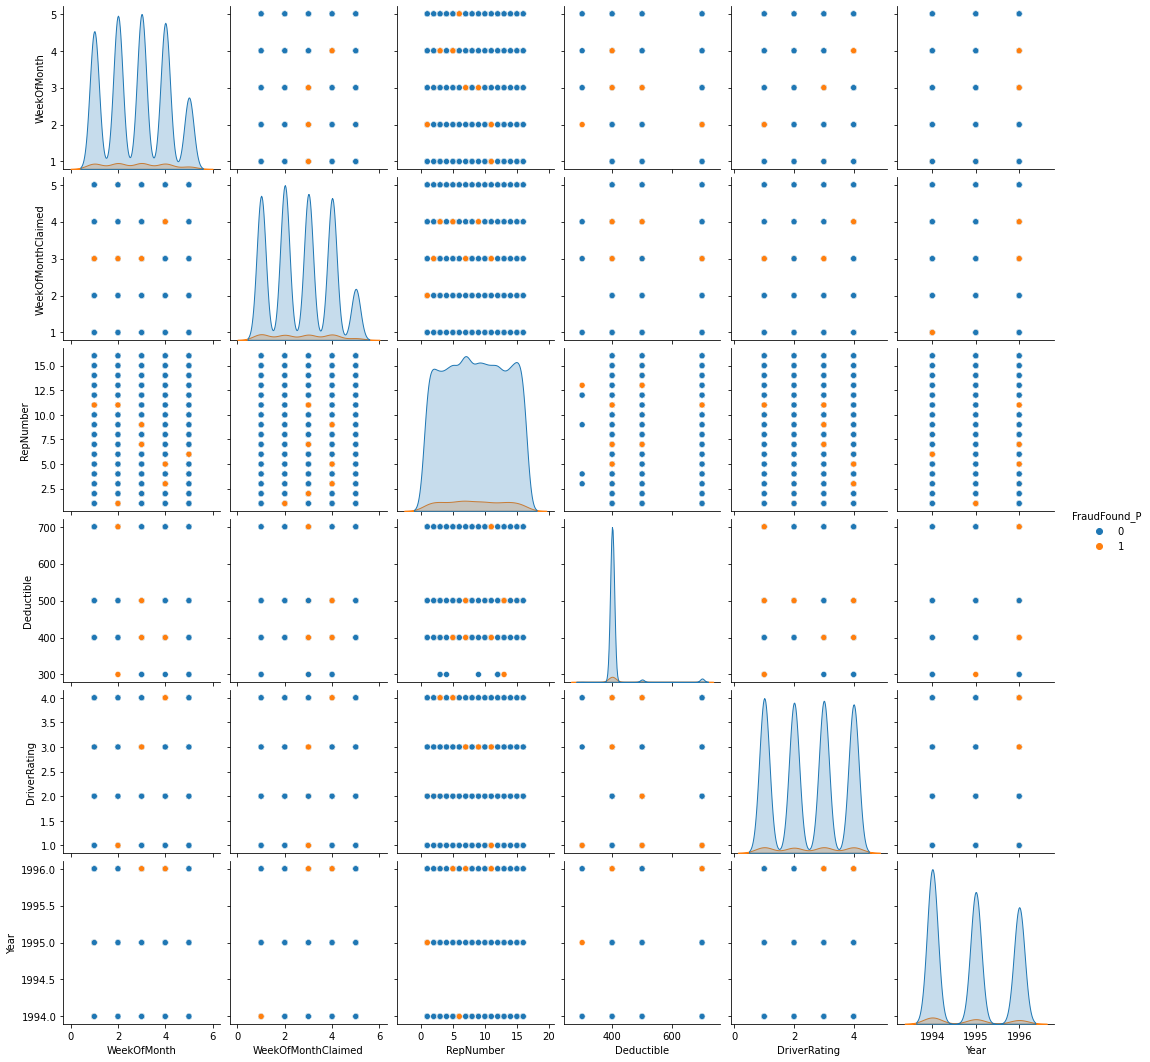

In [ ]:
# sns.pairplot(data=char_combined, hue='FraudFound_P')

Feature Selection - Categorical Features

In [22]:
char_unique_levels = pd.DataFrame(char.apply(lambda x:unique_counts(x)))
char_unique_levels

,0
Month,12
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
Sex,2
MaritalStatus,4
Fault,2
PolicyType,9


In [23]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]
char.dtypes

Month                     object
DayOfWeek                 object
Make                      object
AccidentArea              object
DayOfWeekClaimed          object
MonthClaimed              object
Sex                       object
MaritalStatus             object
Fault                     object
PolicyType                object
VehicleCategory           object
VehiclePrice              object
Days_Policy_Accident      object
Days_Policy_Claim         object
PastNumberOfClaims        object
AgeOfVehicle              object
AgeOfPolicyHolder         object
PoliceReportFiled         object
WitnessPresent            object
AgentType                 object
NumberOfSuppliments       object
AddressChange_Claim       object
NumberOfCars              object
BasePolicy                object
Age                     category
WeekOfMonth                int64
WeekOfMonthClaimed         int64
RepNumber                  int64
Deductible                 int64
DriverRating               int64
Year      

Bi Variate Analysis

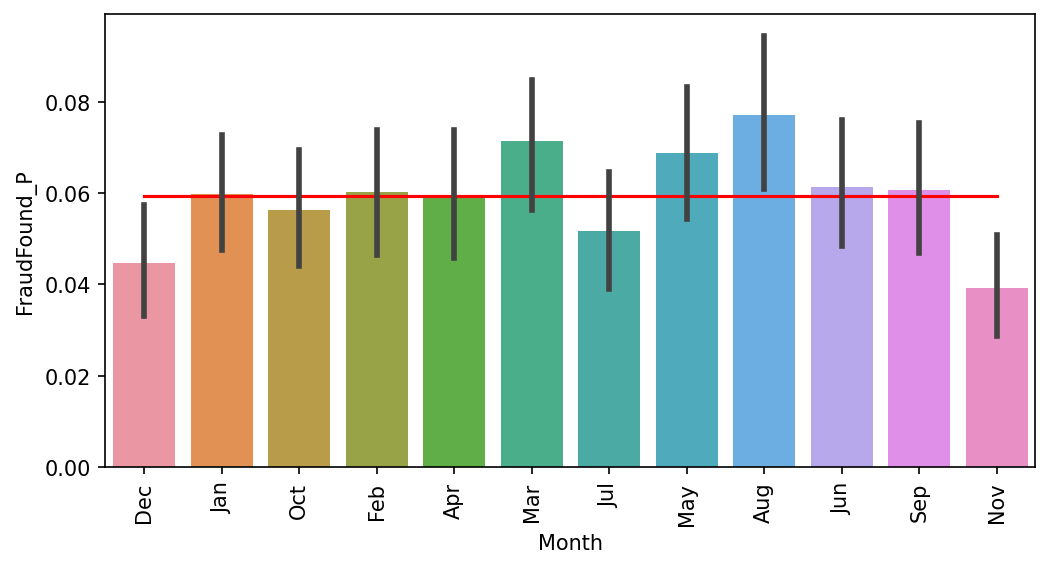

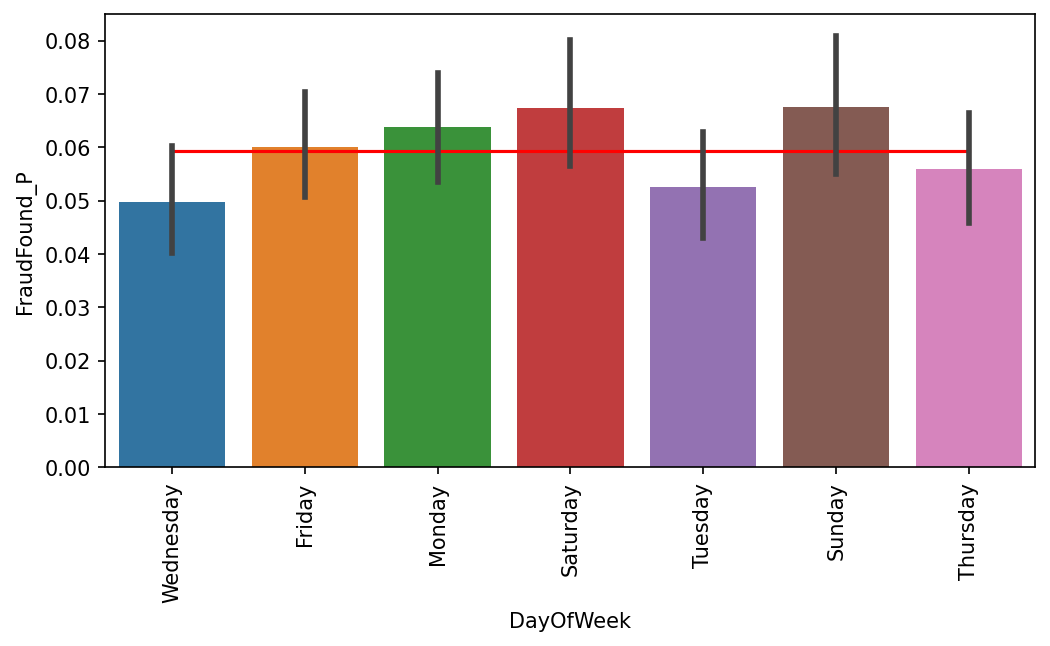

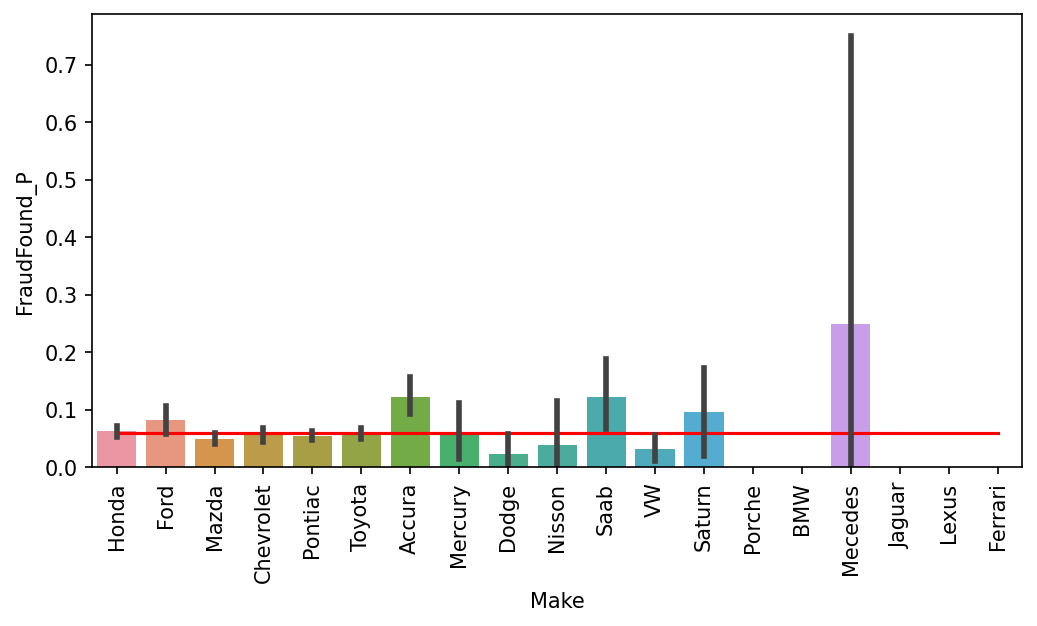

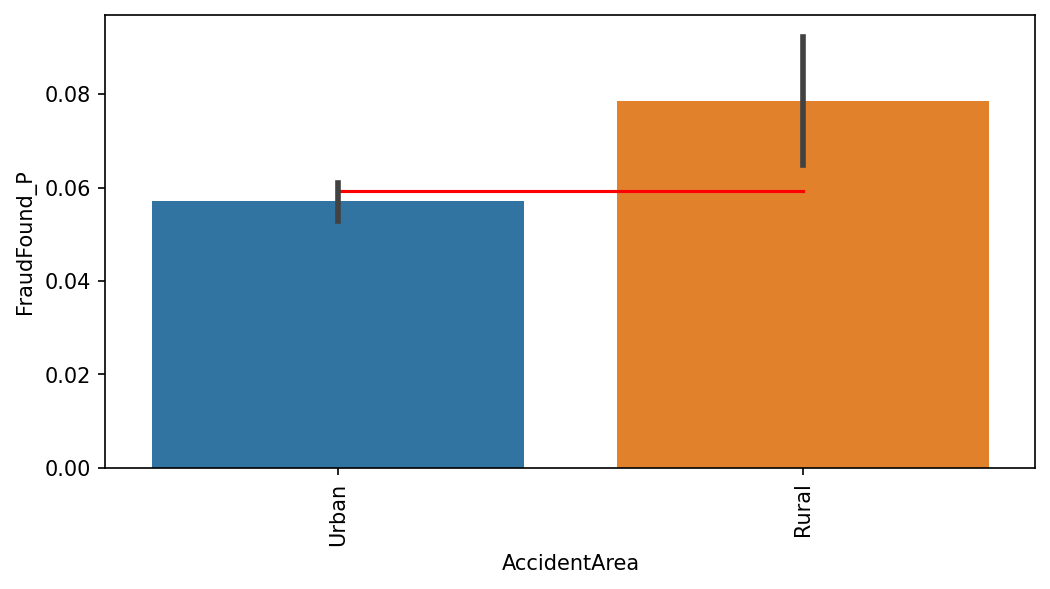

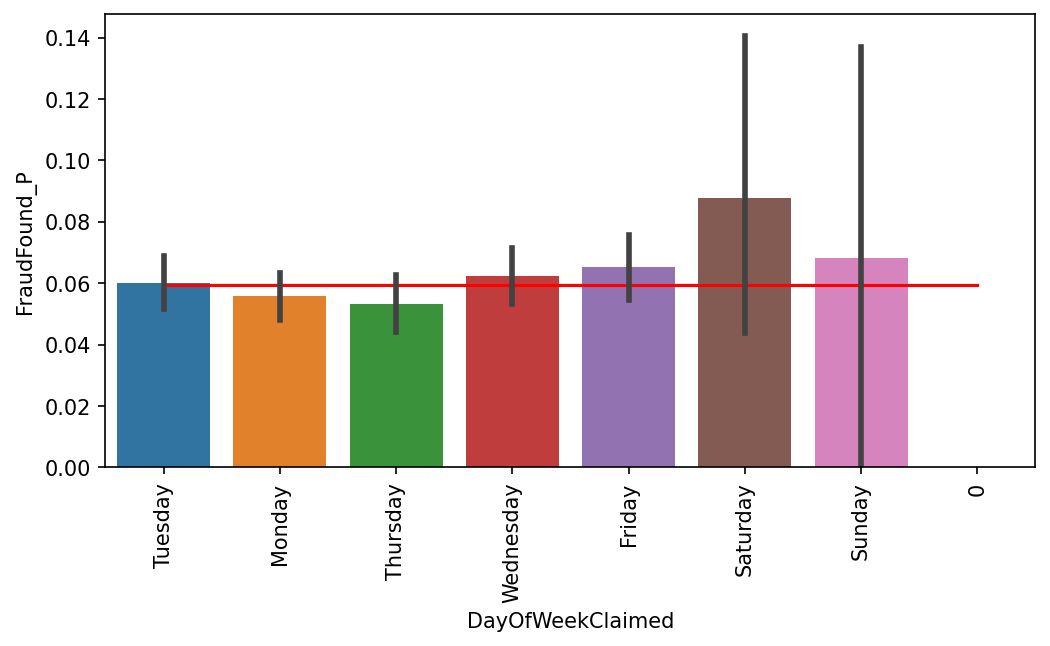

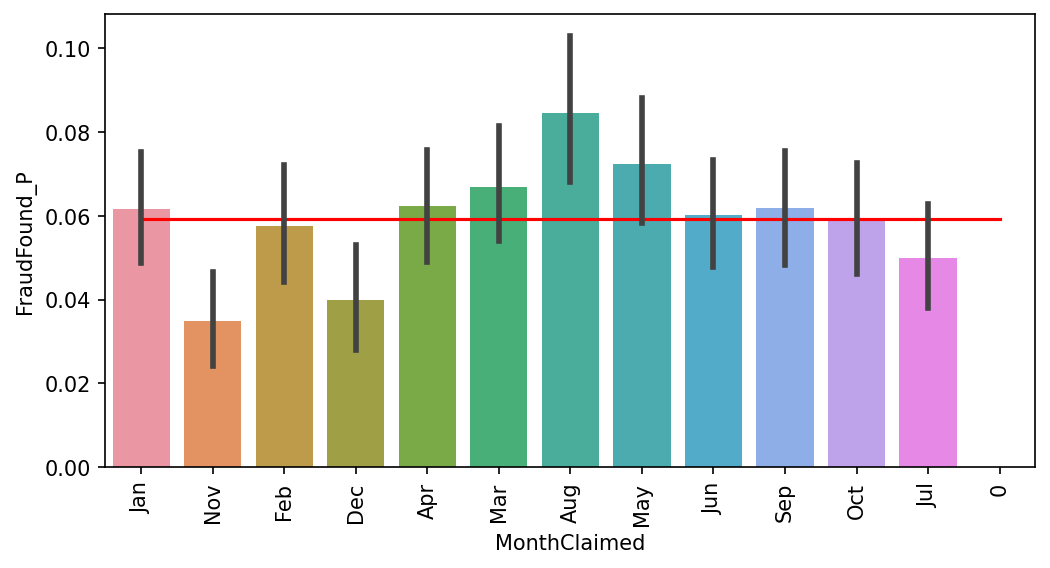

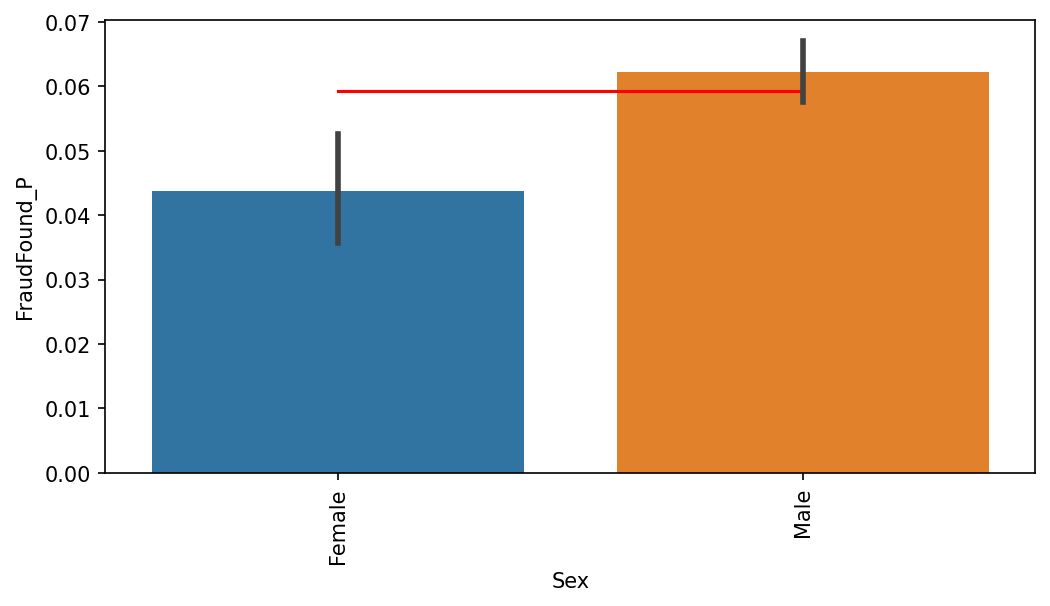

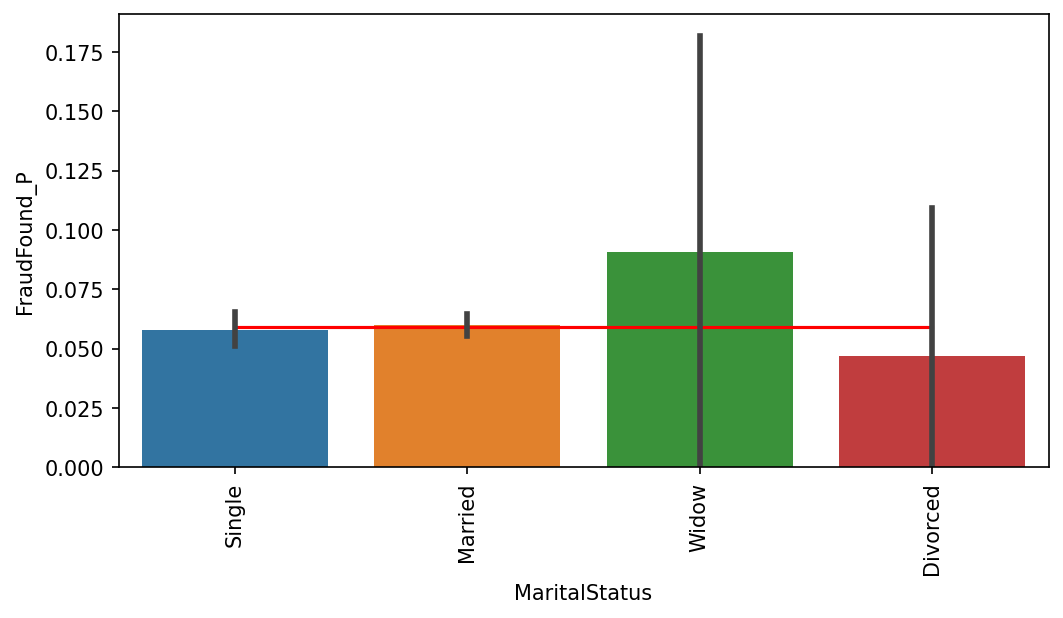

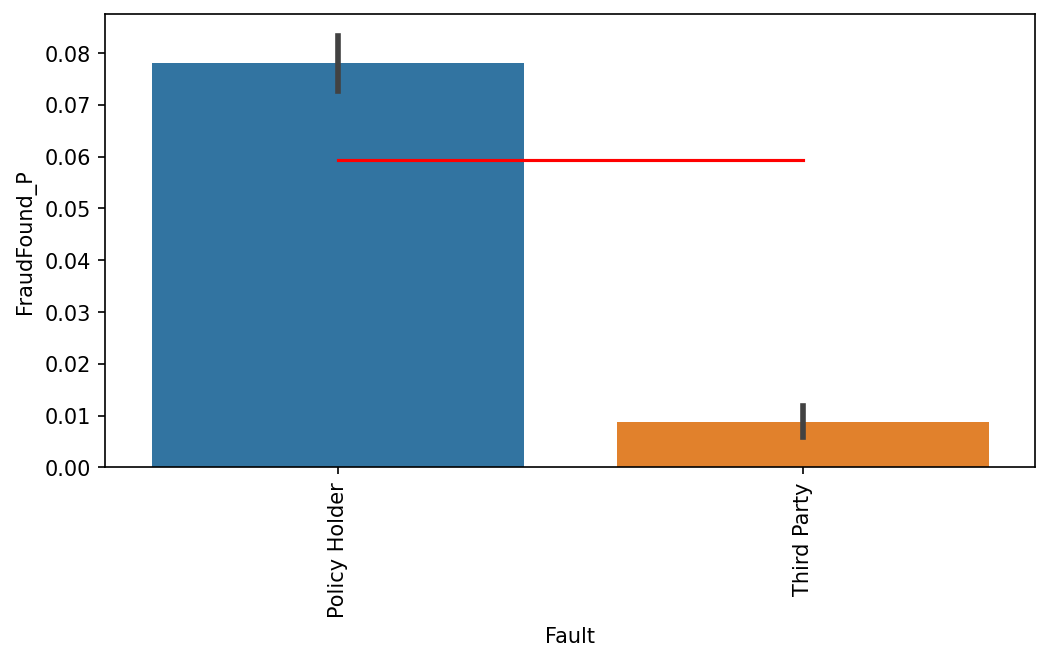

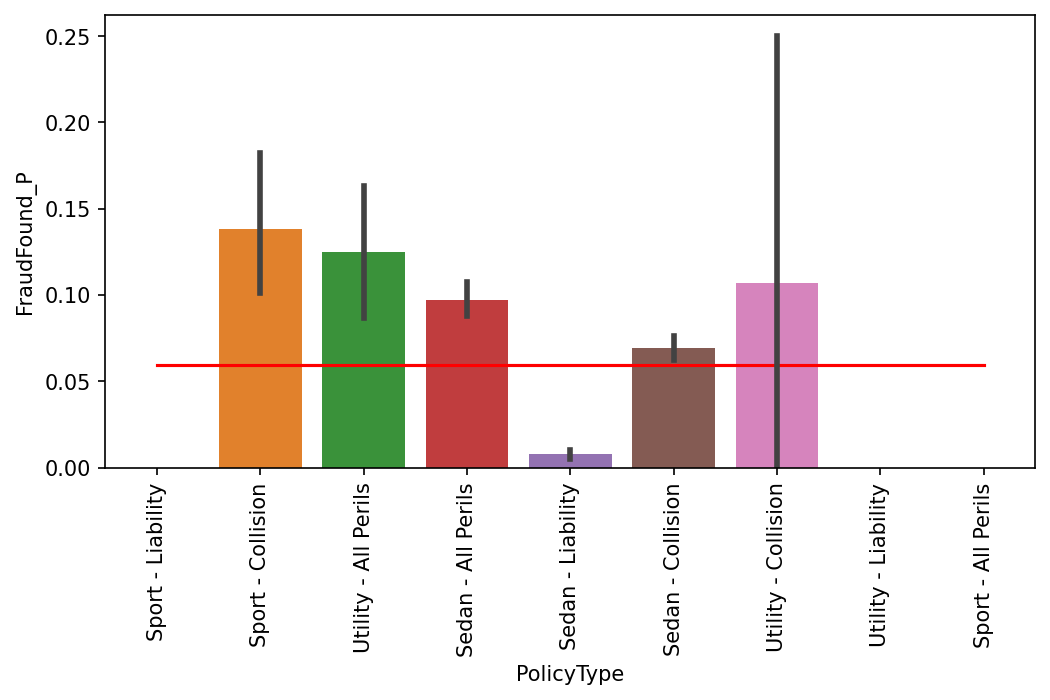

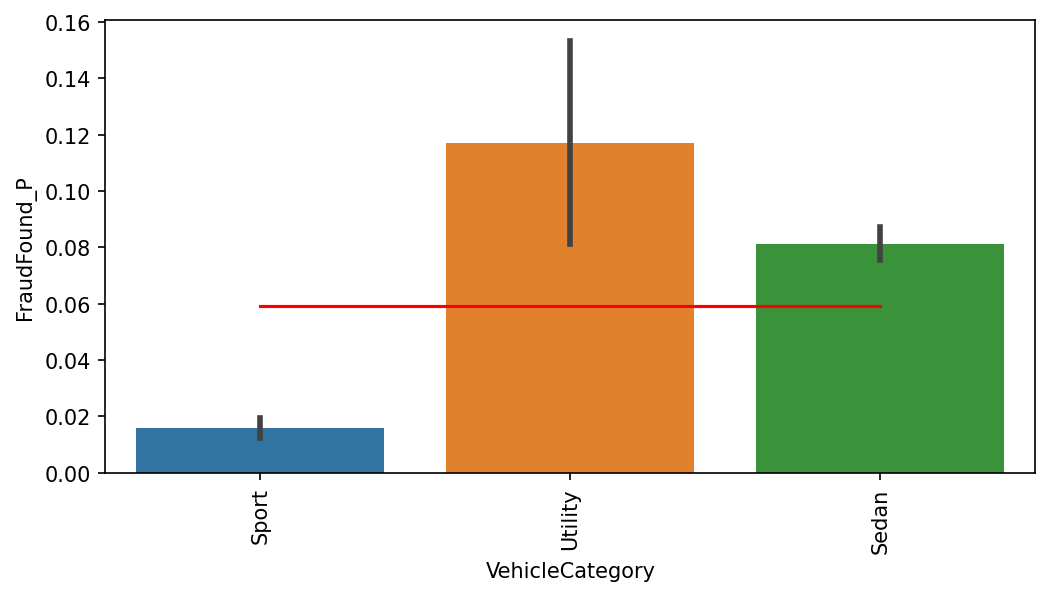

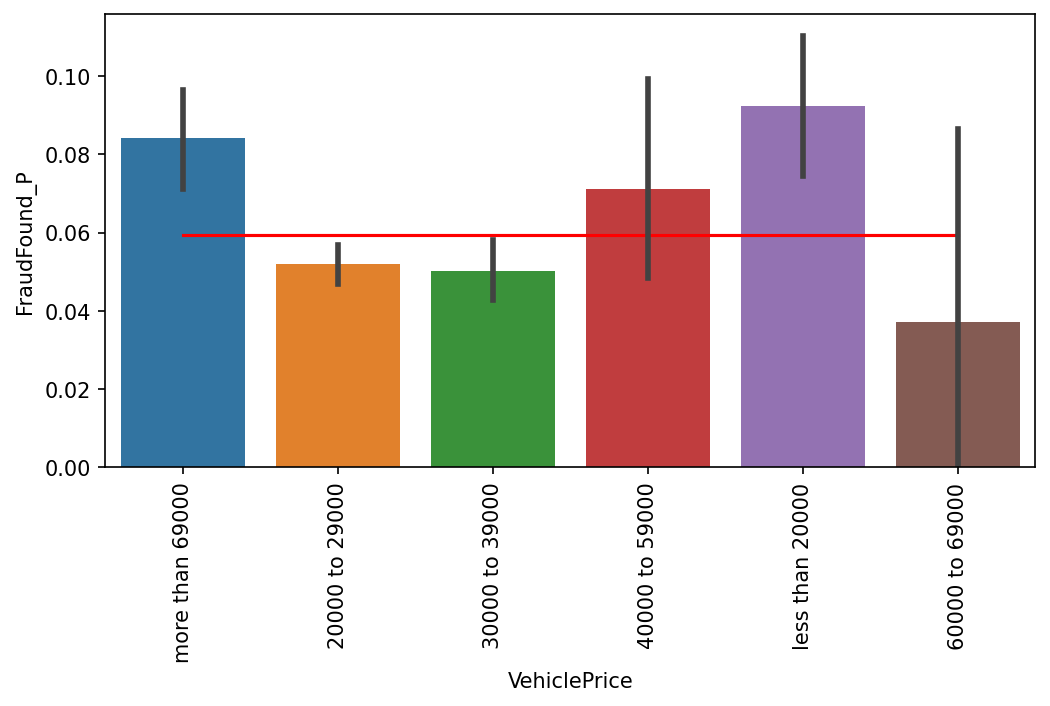

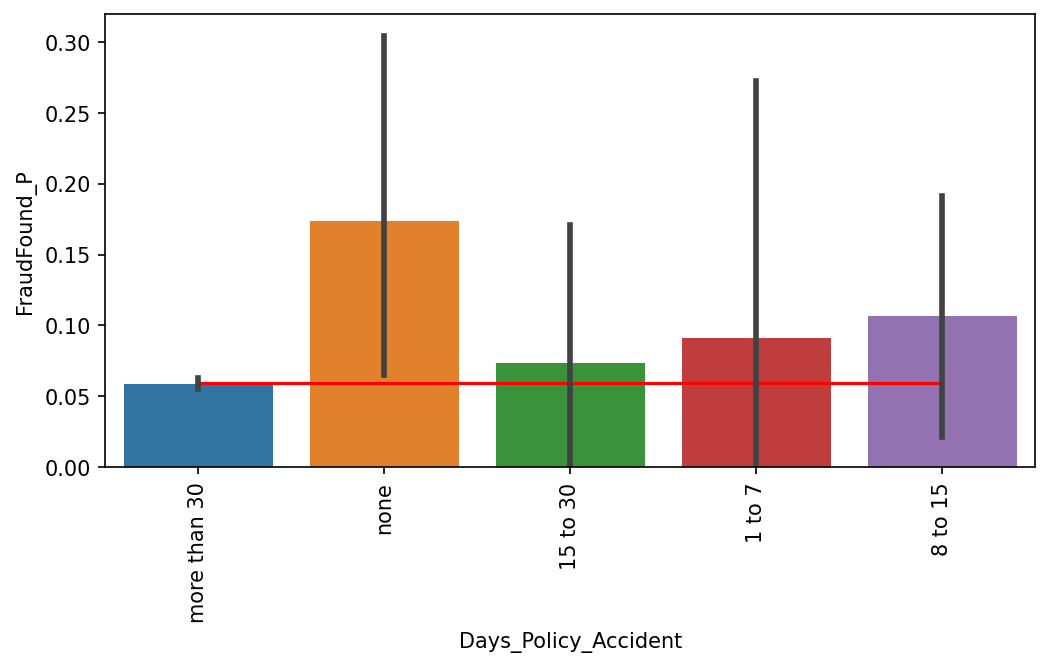

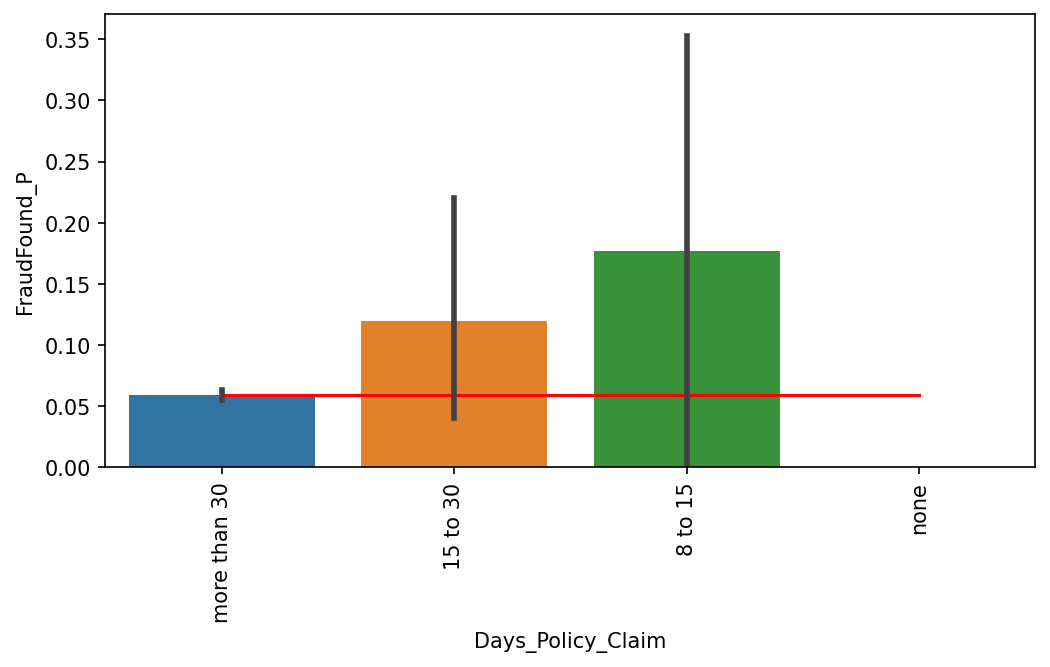

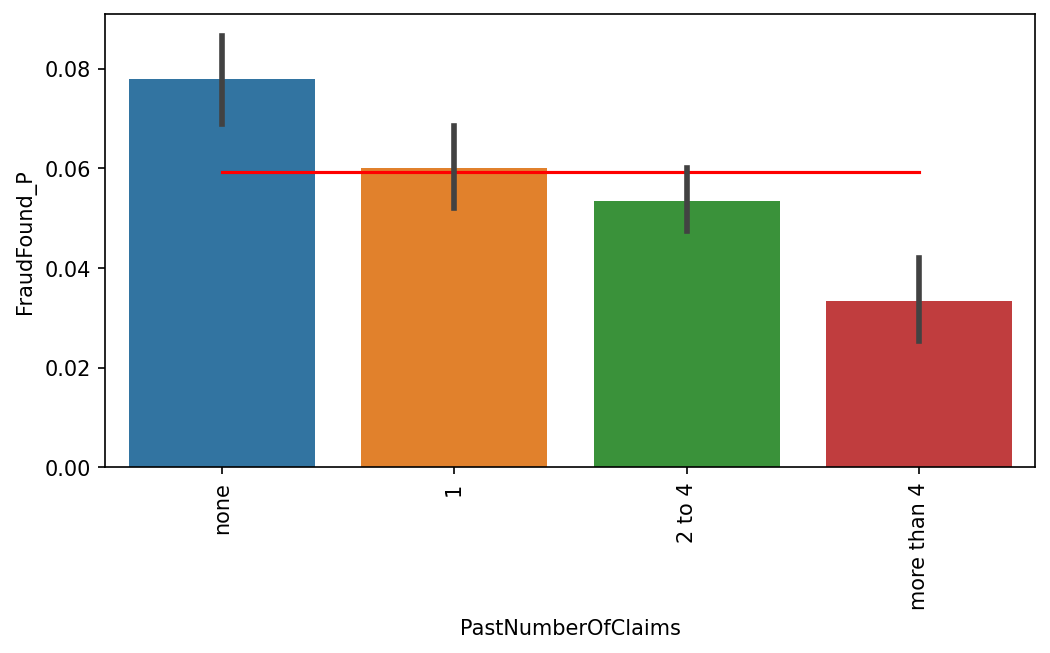

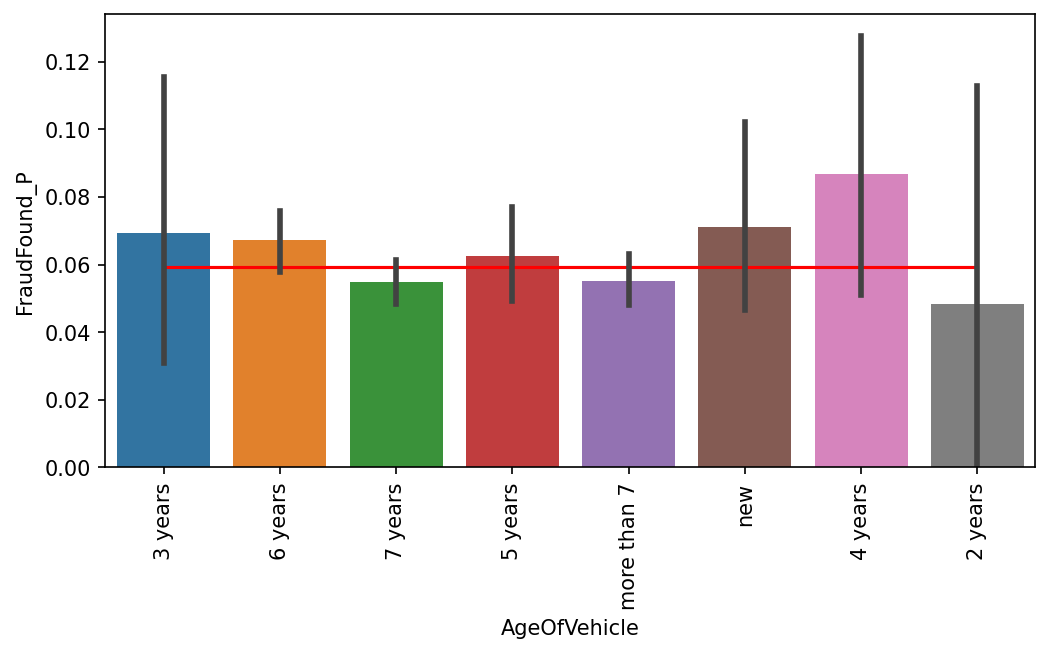

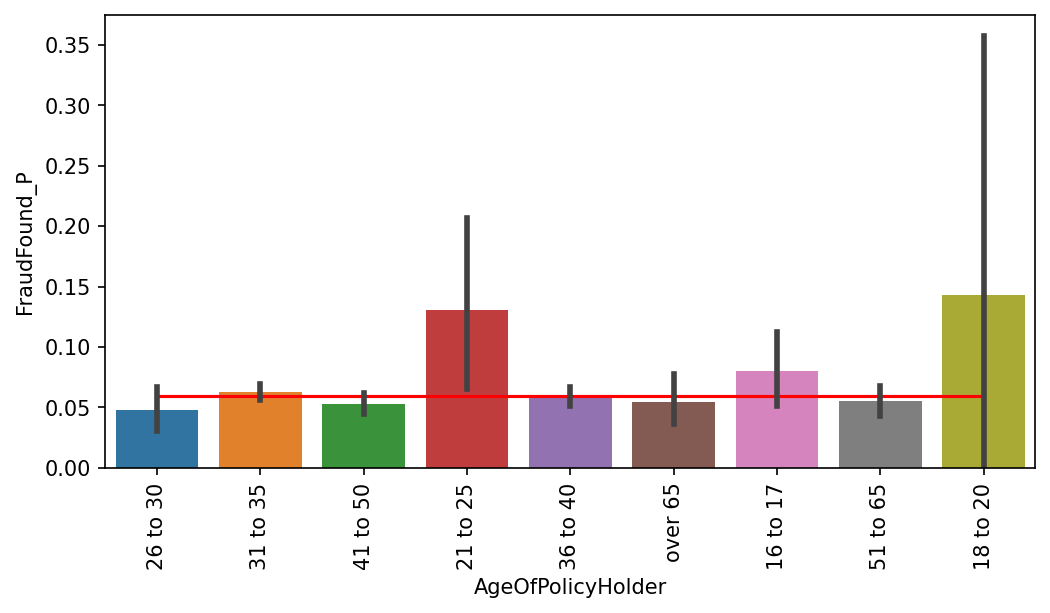

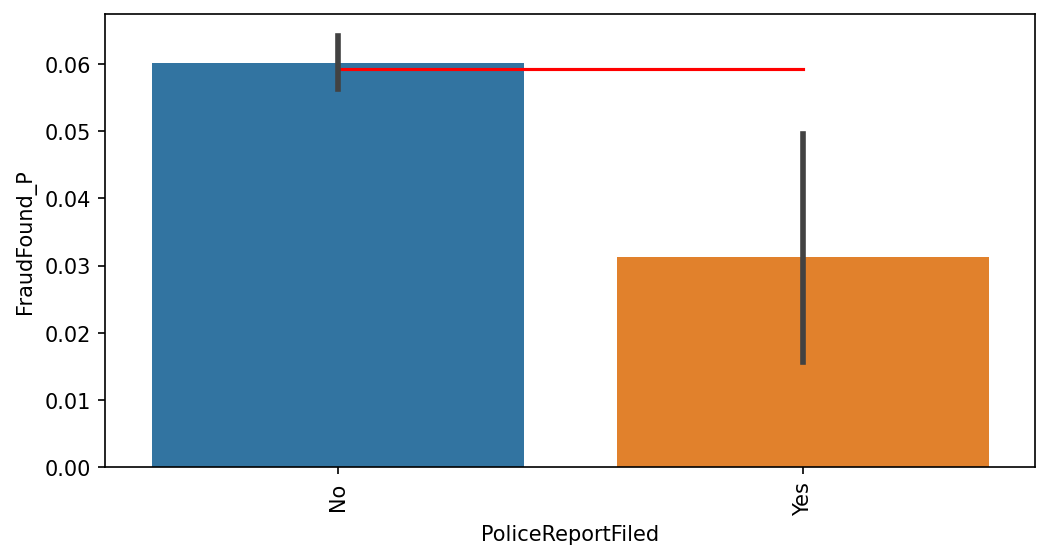

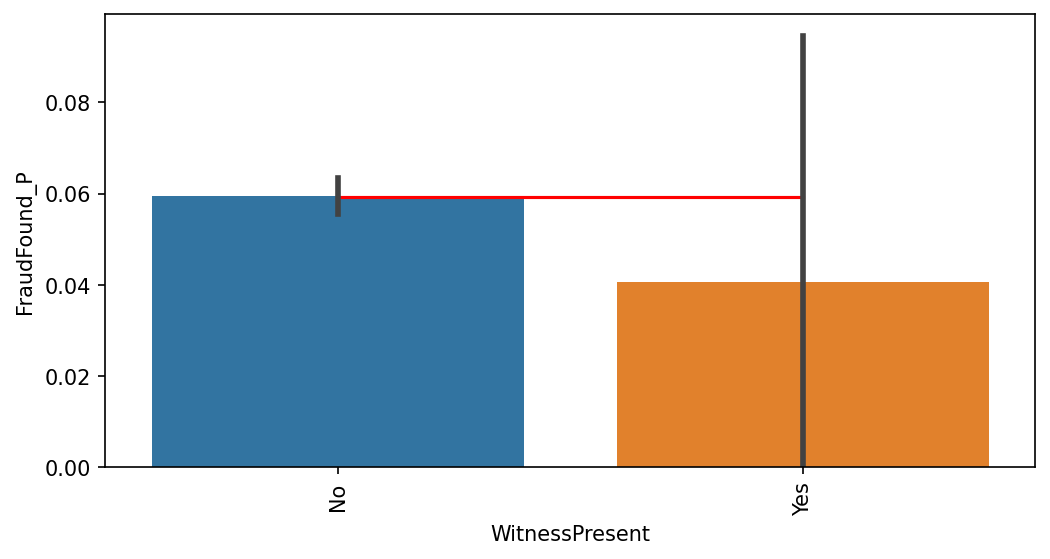

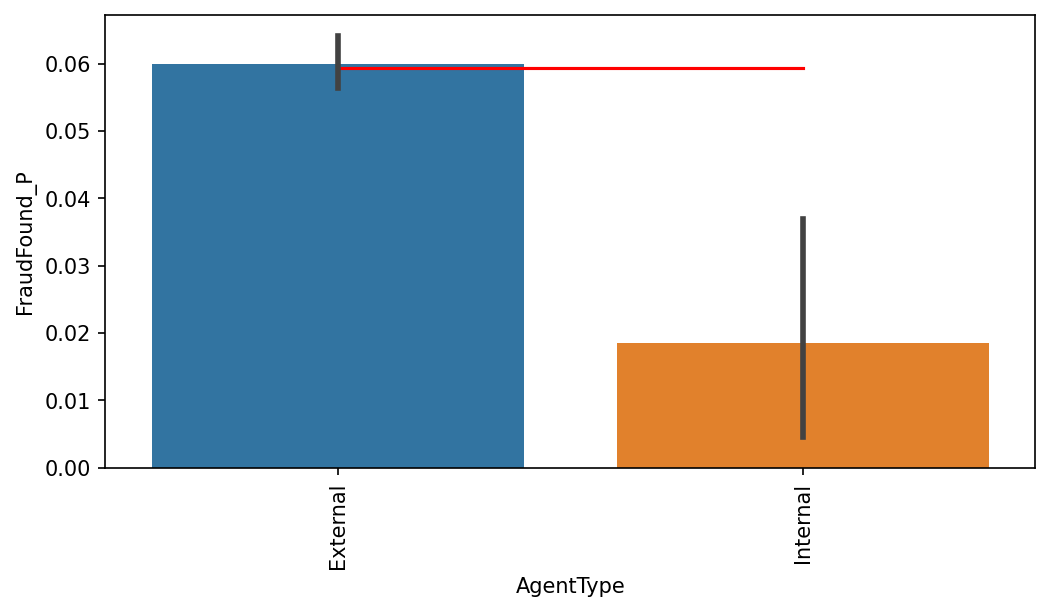

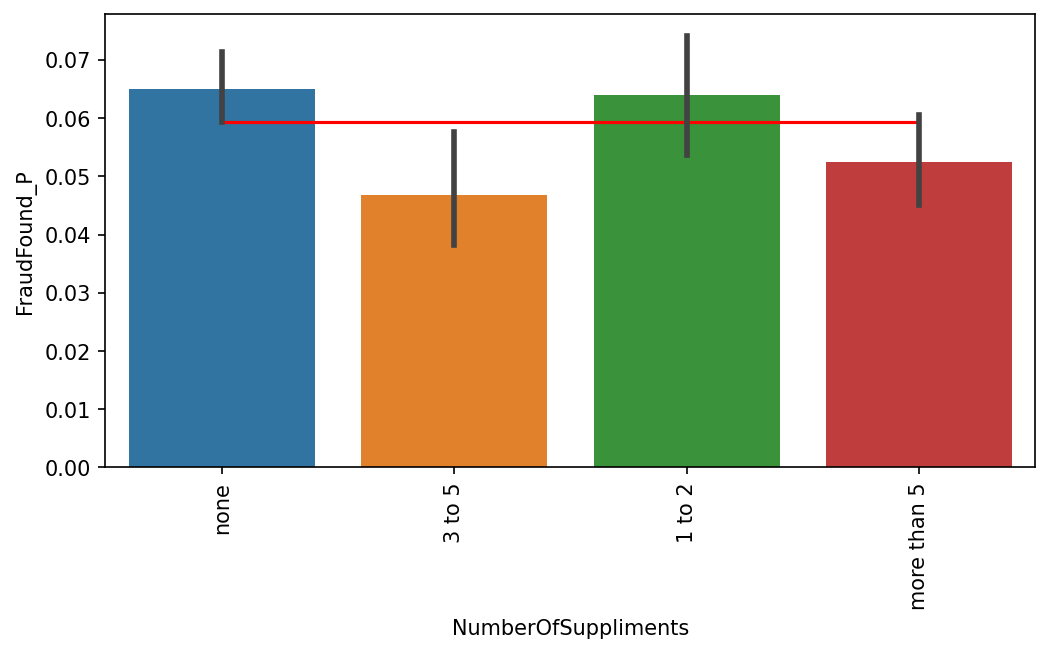

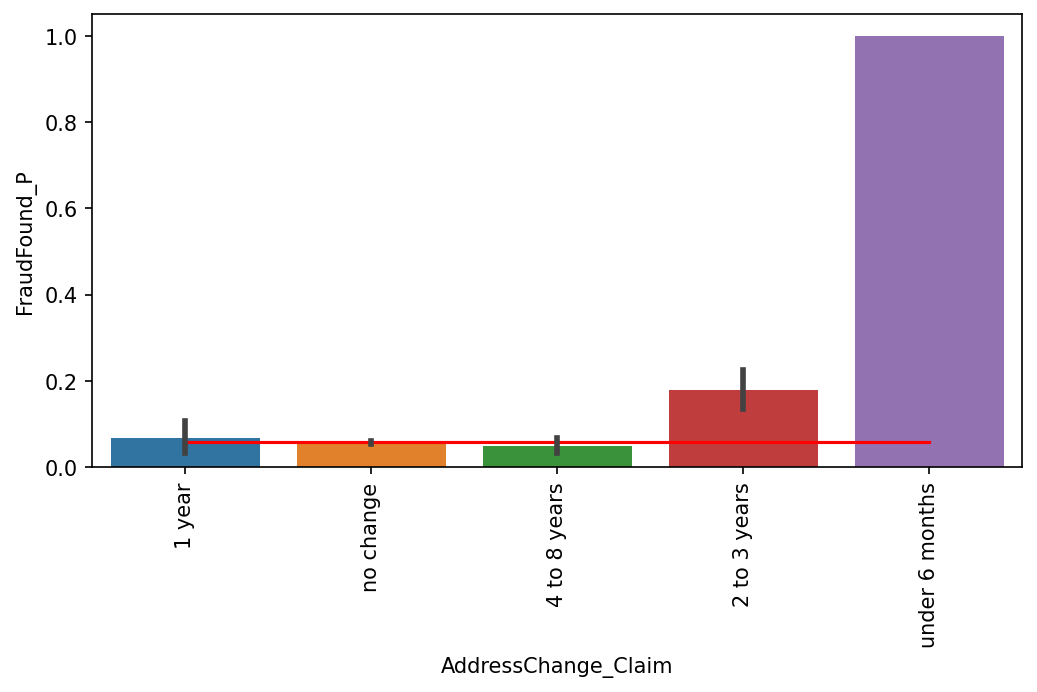

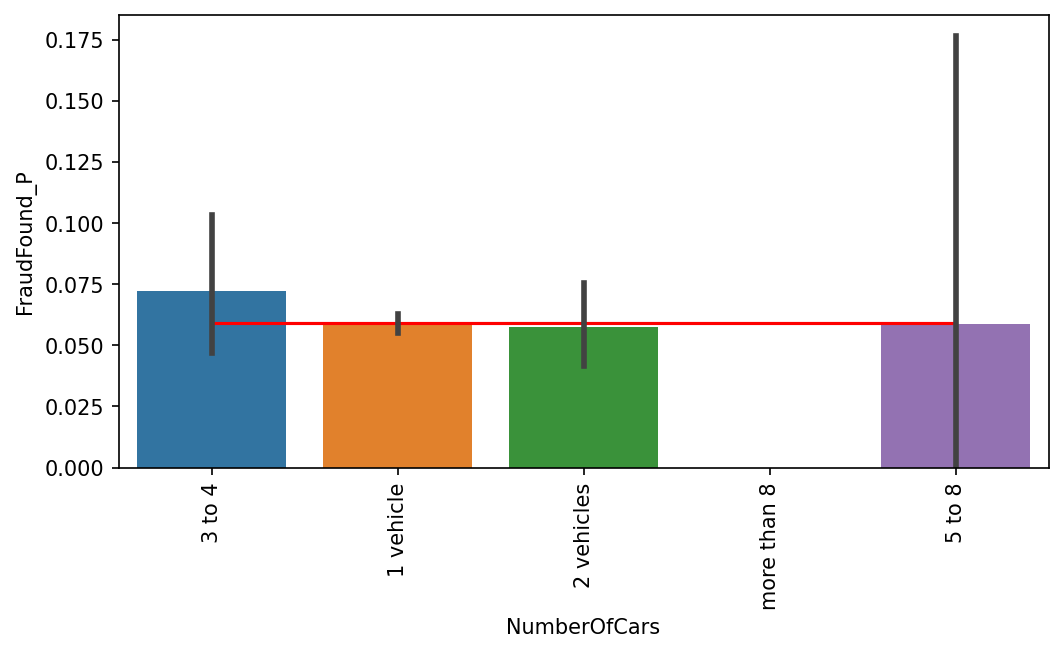

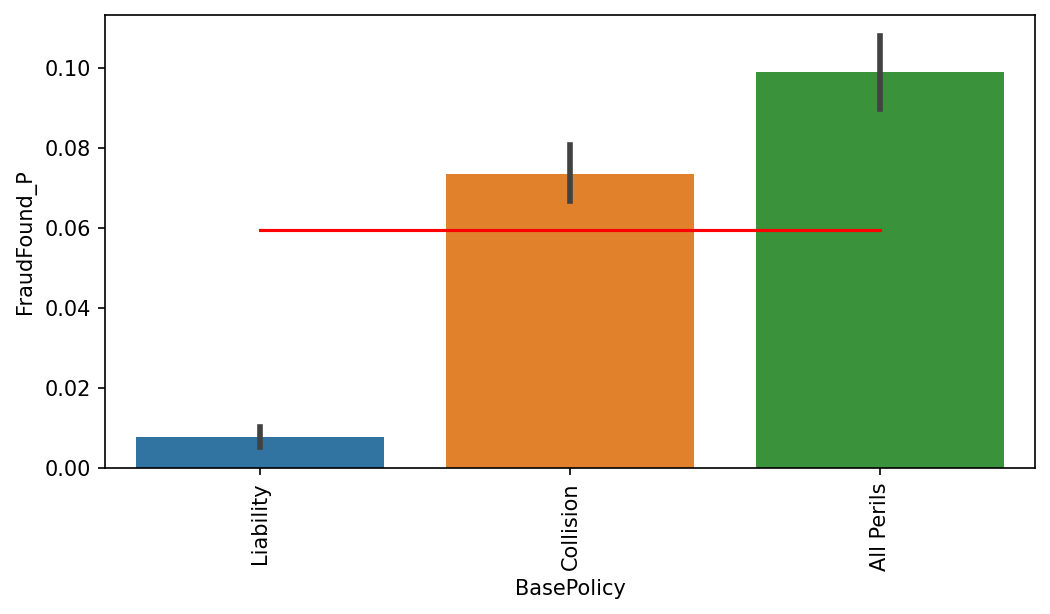

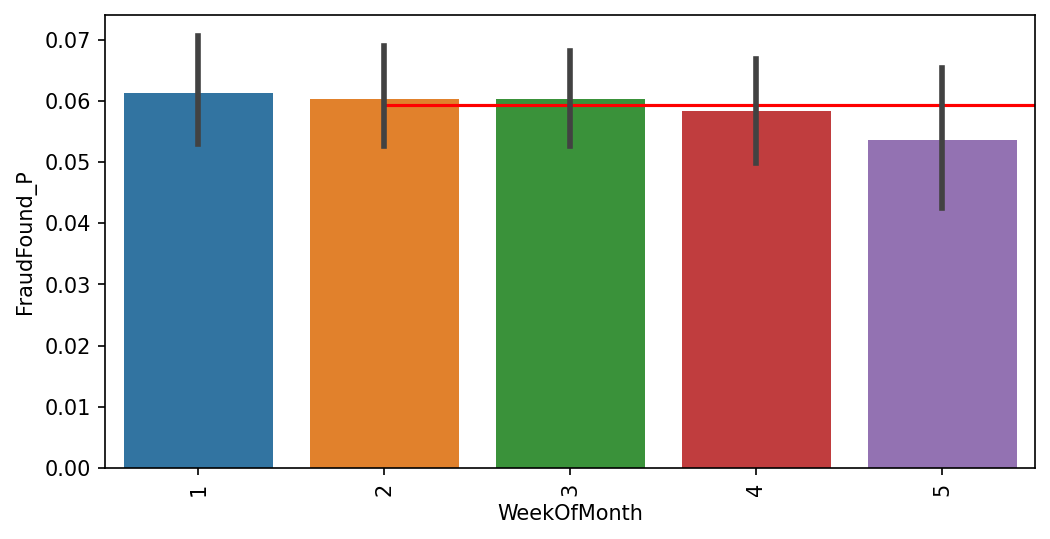

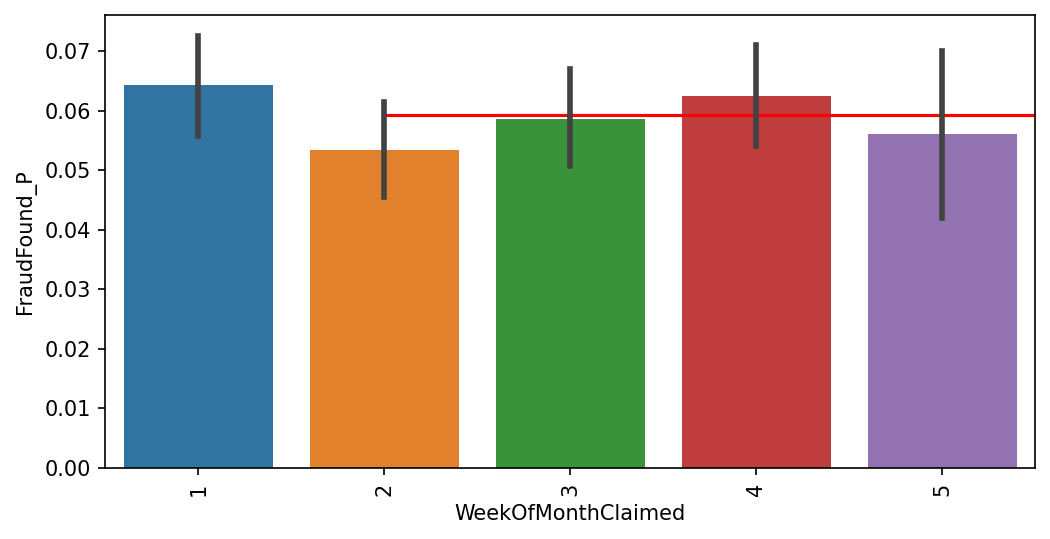

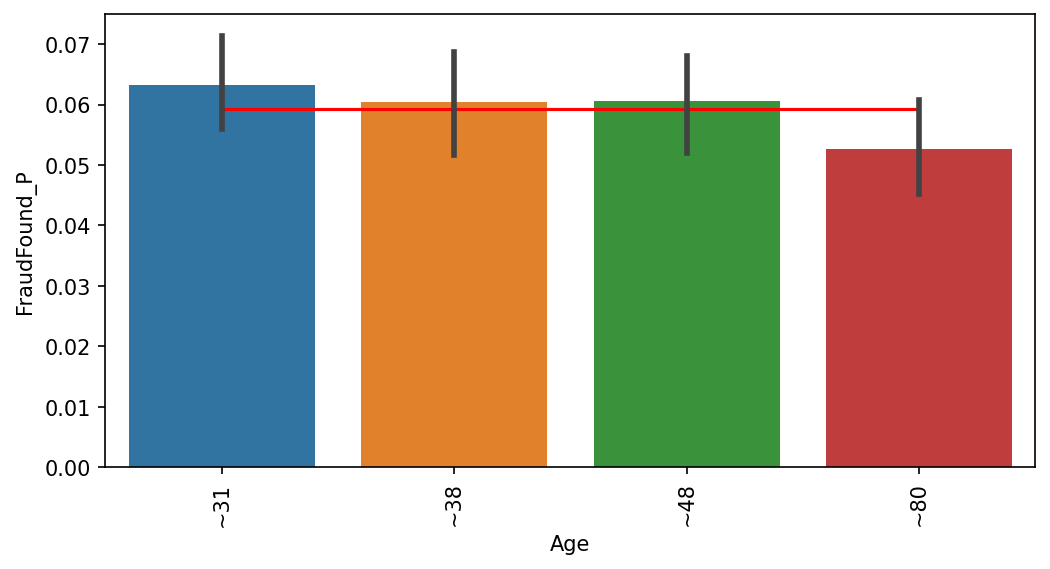

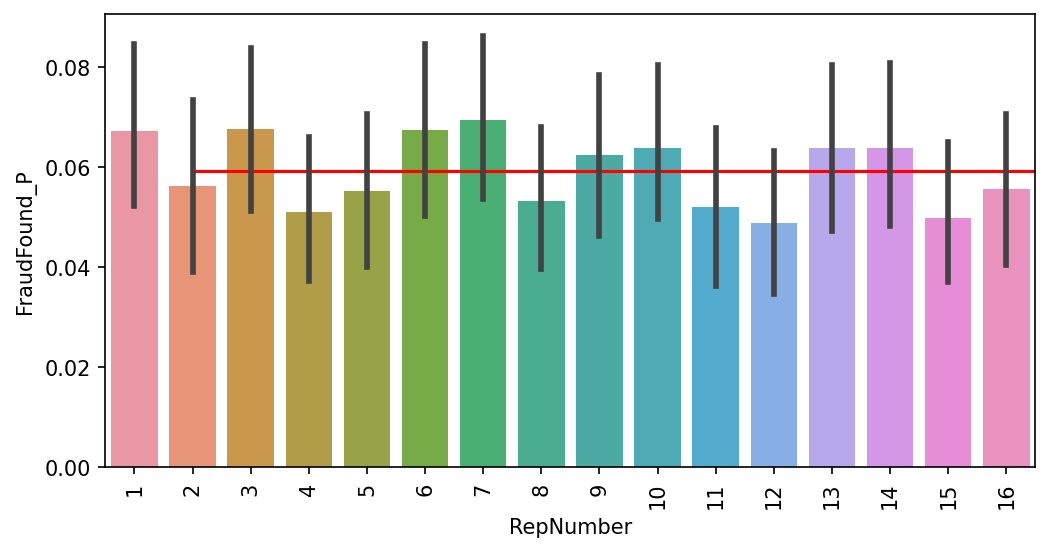

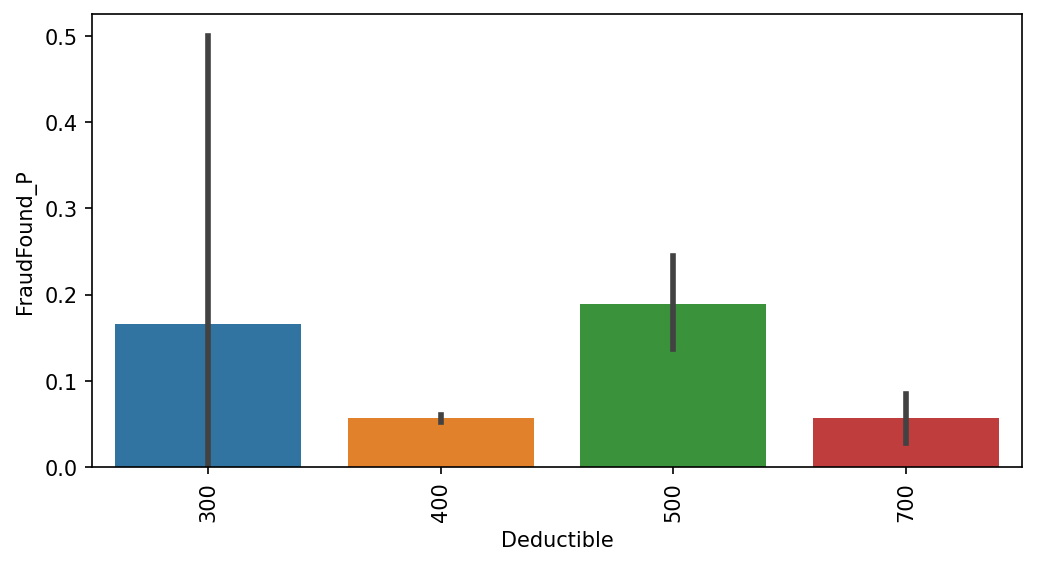

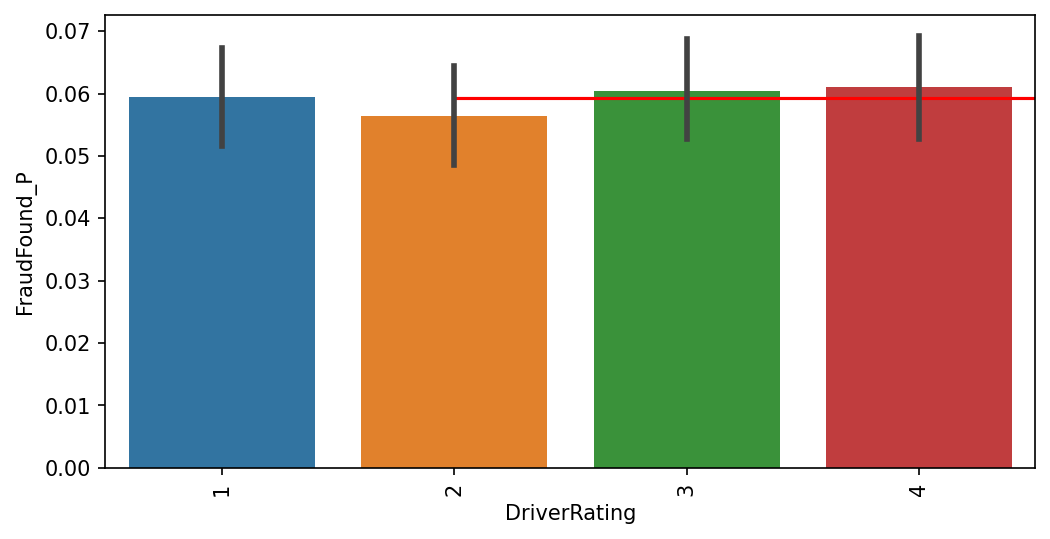

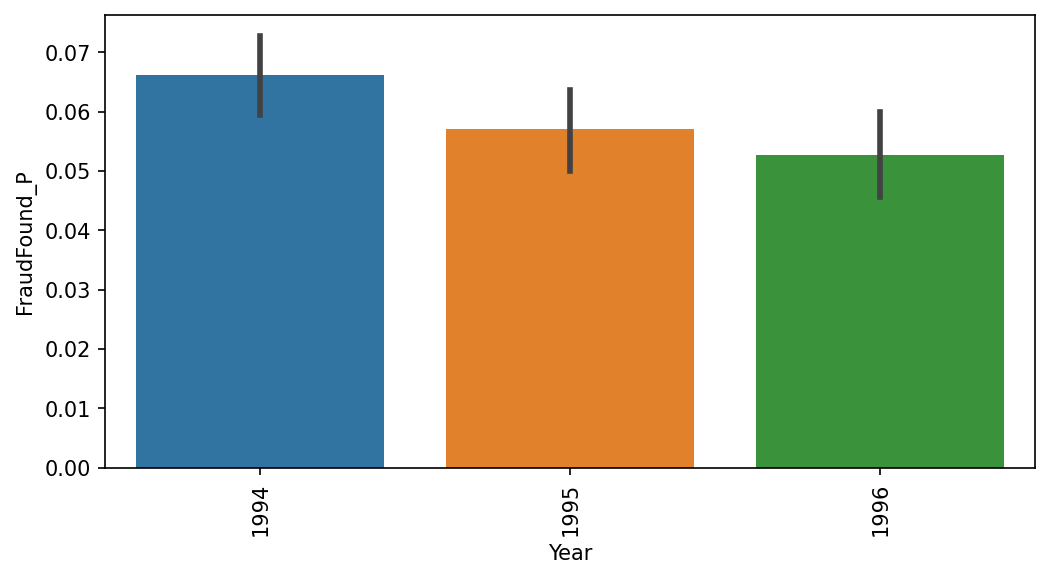

In [ ]:
X_char_merged=pd.concat([char, y],axis=1,join='inner')

for col in char.columns:
    plt.figure(figsize=(8, 4), dpi=150)
    sns.lineplot(x=col, y=y.mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y='FraudFound_P', data=X_char_merged, estimator=np.mean)
    plt.xticks(rotation=90)
plt.show()

In [24]:
char = char.drop(["Month", "Make", "DayOfWeek", "DayOfWeekClaimed", "MonthClaimed", "VehiclePrice", "Days_Policy_Accident", "AgeOfVehicle", "AgeOfPolicyHolder", "NumberOfSuppliments", "NumberOfCars", "WeekOfMonthClaimed", "RepNumber", "Deductible", "DriverRating"], axis=1)

In [25]:
char.dtypes

AccidentArea             object
Sex                      object
MaritalStatus            object
Fault                    object
PolicyType               object
VehicleCategory          object
Days_Policy_Claim        object
PastNumberOfClaims       object
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
AddressChange_Claim      object
BasePolicy               object
Age                    category
WeekOfMonth               int64
Year                      int64
dtype: object

In [26]:
char['WeekOfMonth']=char['WeekOfMonth'].astype('object')
# char['DriverRating']=char['DriverRating'].astype('object')
char['Year']=char['Year'].astype('object')
# char['WeekOfMonthClaimed']=char['Year'].astype('object')
# char['RepNumber']=char['Year'].astype('object')
# char['Deductible']=char['Year'].astype('object')
# char['DriverRating']=char['Year'].astype('object')

In [27]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(13420, 40)

In [28]:
pd.concat([X_char_dum, y], axis=1, join='inner').corr()['FraudFound_P']

AccidentArea_Urban                   -0.027700
Sex_Male                              0.028645
MaritalStatus_Married                 0.003800
MaritalStatus_Single                 -0.003995
MaritalStatus_Widow                   0.006641
Fault_Third Party                    -0.130364
PolicyType_Sedan - Collision          0.032037
PolicyType_Sedan - Liability         -0.151566
PolicyType_Sport - All Perils        -0.009455
PolicyType_Sport - Collision          0.050354
PolicyType_Sport - Liability         -0.002168
PolicyType_Utility - All Perils       0.041181
PolicyType_Utility - Collision        0.009258
PolicyType_Utility - Liability       -0.008943
VehicleCategory_Sport                -0.134212
VehicleCategory_Utility               0.039034
Days_Policy_Claim_8 to 15             0.017664
Days_Policy_Claim_more than 30       -0.022066
Days_Policy_Claim_none               -0.002168
PastNumberOfClaims_2 to 4            -0.018437
PastNumberOfClaims_more than 4       -0.042226
PastNumberOfC

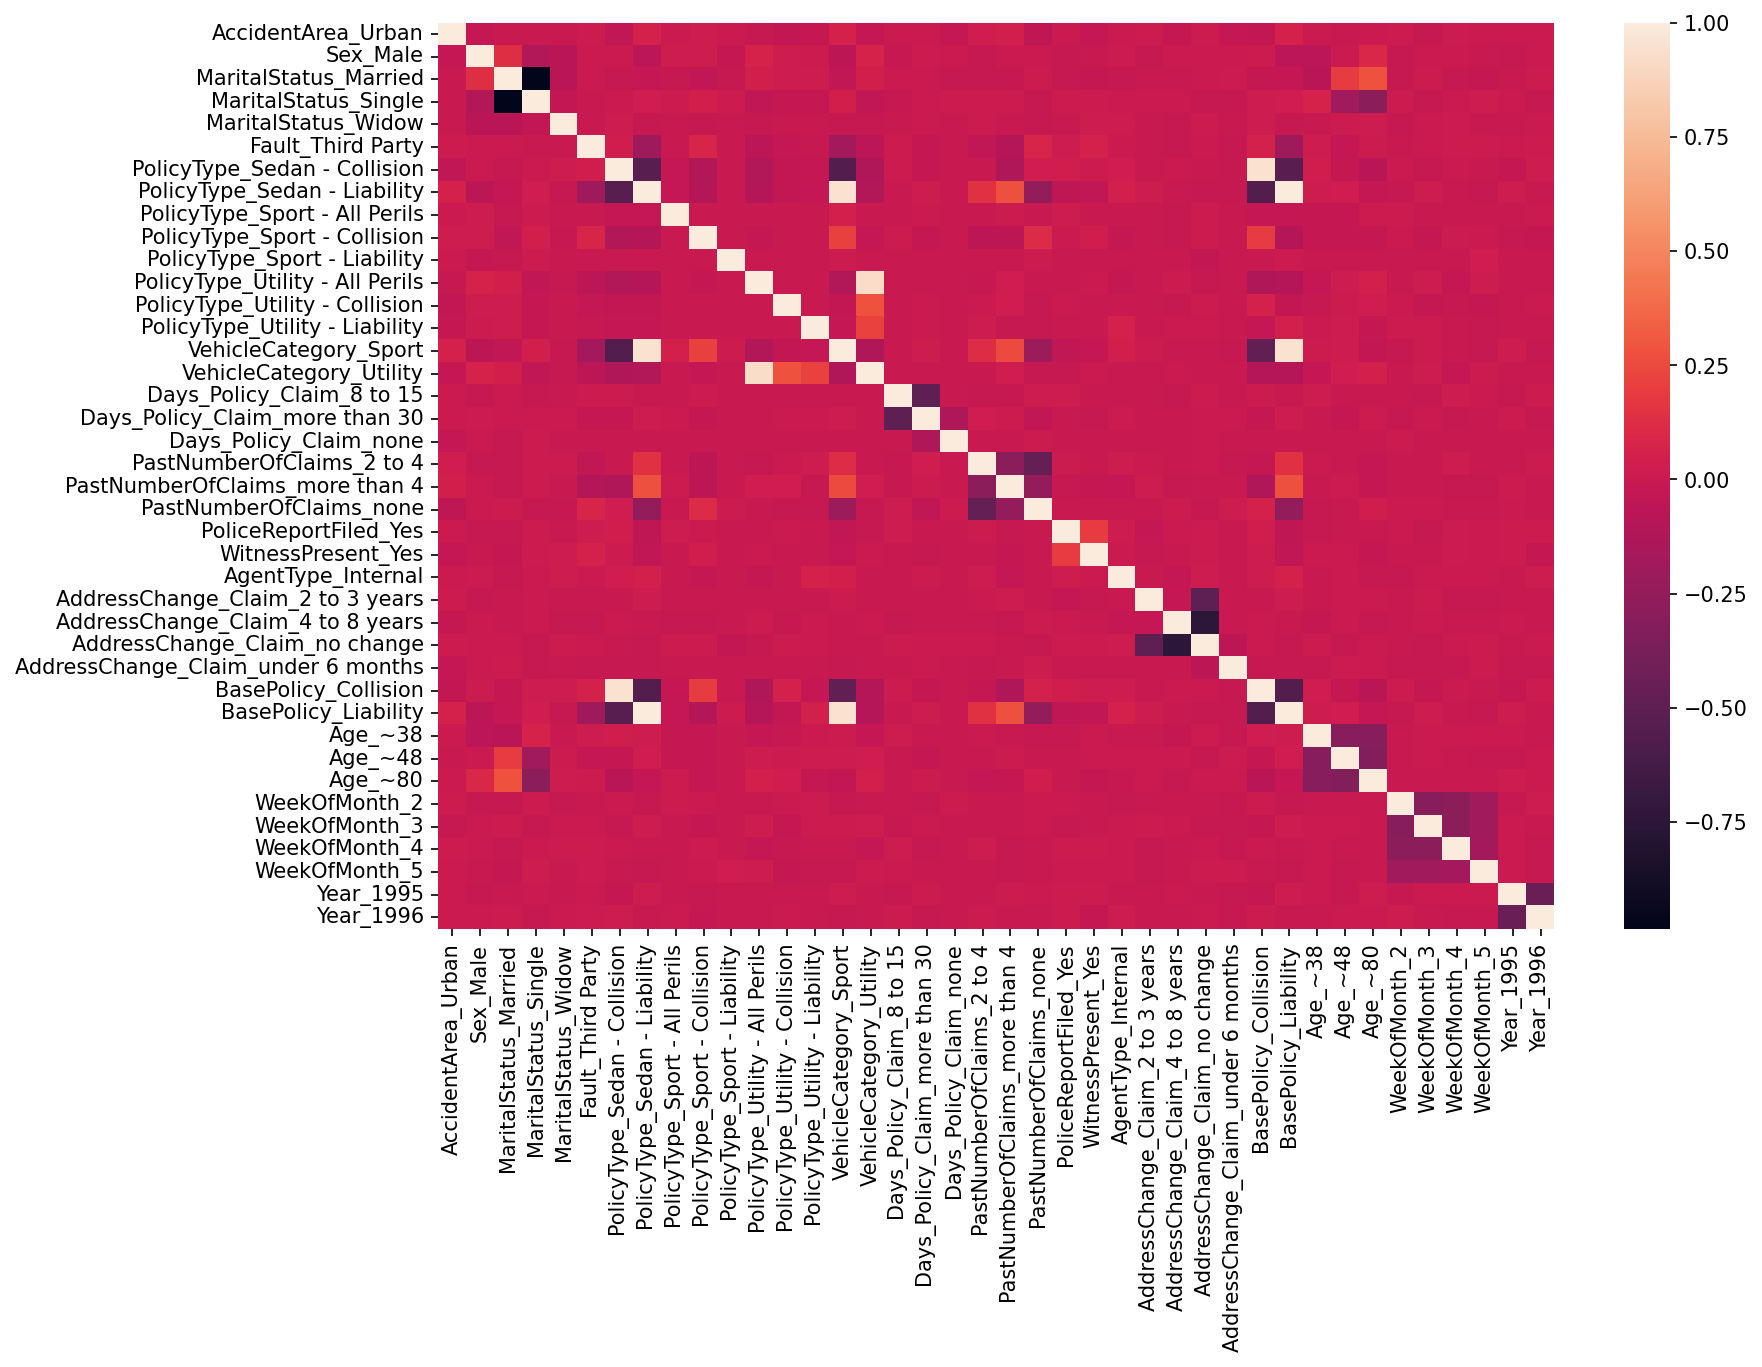

In [ ]:
plt.figure(figsize=(12, 8), dpi=150)
sns.heatmap(X_char_dum.corr(), fmt='.2f')

In [29]:
X_char_dum.head()

,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,...,BasePolicy_Liability,Age_~38,Age_~48,Age_~80,WeekOfMonth_2,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,Year_1995,Year_1996
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Creating the Master Feature Set for Model Development

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_char_dum, y, test_size=0.20, random_state=101)

In [31]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
sm = SMOTE(random_state = 101)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [32]:
print("Shape of Training Data", X_train.shape)
print("Shape of Testing Data", X_test.shape)
print("Fraudelent Rate in Training Data", y_train.mean())
print("Fraudelent Rate in Testing Data", y_test.mean())

Shape of Training Data (20190, 40)
Shape of Testing Data (2684, 40)
Fraudelent Rate in Training Data 0.5
Fraudelent Rate in Testing Data 0.05774962742175857


In [ ]:
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Black Box Ensemble Methods - Random Forest (With Bagging)

In [35]:
# Building a Decision Tree Model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=101)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
tree_grid.fit(X_train, y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [36]:
dtree.set_params(criterion='gini', max_depth=3, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [37]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [38]:
pred = dtree.predict(X_test)

In [39]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score, confusion_matrix

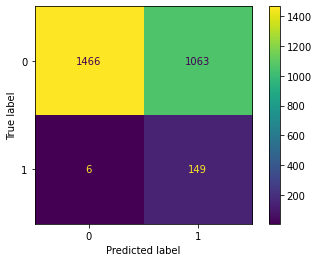

In [40]:
plot_confusion_matrix(dtree, X_test, y_test)

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2529
           1       0.12      0.96      0.22       155

    accuracy                           0.60      2684
   macro avg       0.56      0.77      0.48      2684
weighted avg       0.95      0.60      0.70      2684



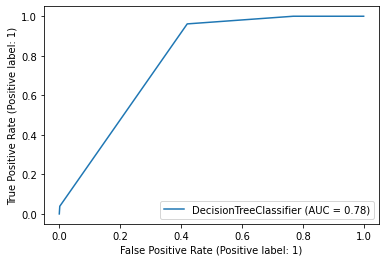

In [42]:
plot_roc_curve(dtree, X_test, y_test)

In [43]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [44]:
rforest = RandomForestClassifier(random_state=101, oob_score=True, )

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = RandomizedSearchCV(rforest, cv=10, param_distributions=param_grid, scoring='accuracy', n_jobs=-1, )
rforest_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

Best Parameters using grid search: 
 {'min_samples_split': 20, 'min_samples_leaf': 30, 'max_depth': 4, 'criterion': 'gini'}


In [45]:
rforest.set_params(criterion = 'gini',
                  min_samples_leaf = 30,
                  min_samples_split = 20,
                  max_depth = 4,
                  warm_start=False)

RandomForestClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=20,
                       oob_score=True, random_state=101)

In [ ]:
min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(X_train, y_train)

    oob_error = 1 - rforest.oob_score_
    error_rate[i] = oob_error

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

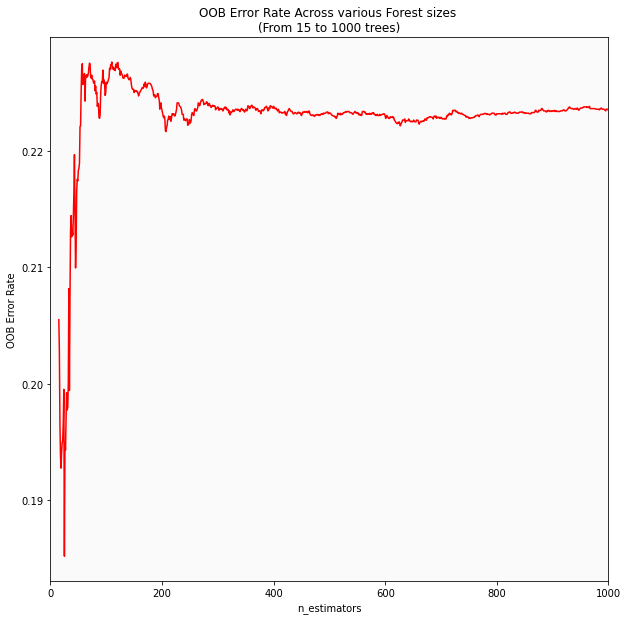

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [46]:
# print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[300]))

NameError: ignored

In [51]:
rforest.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=500, random_state=101)

In [52]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=20,
                       n_estimators=500, random_state=101)

In [53]:
rforest_pred = rforest.predict(X_test)

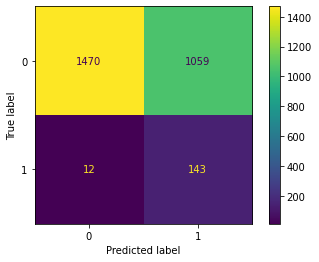

In [54]:
plot_confusion_matrix(rforest, X_test, y_test)

In [61]:
adaboost_model = AdaBoostClassifier(n_estimators=300, )

In [ ]:
min_estimators = 15
max_estimators = 300

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    adaboost_model.set_params(n_estimators=i)
    adaboost_model.fit(X_train, y_train)
    adaboost_predict = adaboost_model.predict(X_test)
    error_rate[i] = 1 - accuracy_score(y_test, adaboost_predict)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

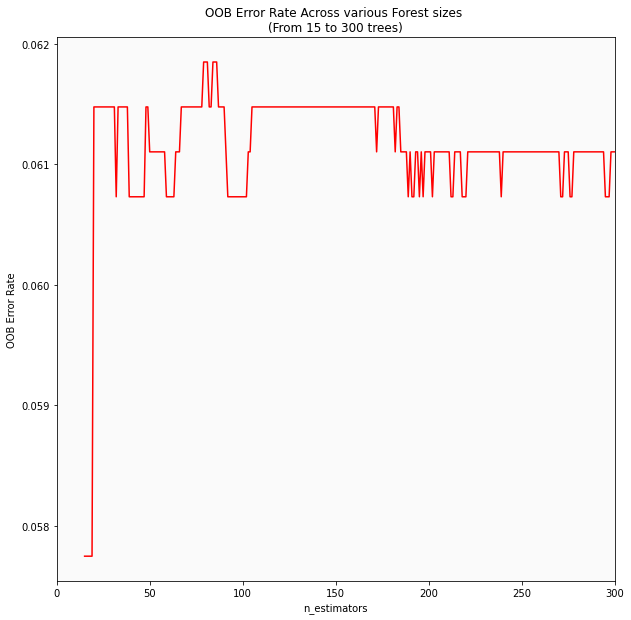

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 300)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

In [62]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=300)

In [63]:
adaboost_pred = adaboost_model.predict(X_test)

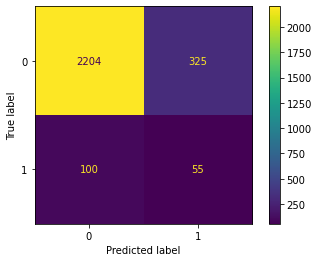

In [64]:
plot_confusion_matrix(adaboost_model, X_test, y_test)

In [65]:
print(classification_report(y_test, adaboost_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2529
           1       0.14      0.35      0.21       155

    accuracy                           0.84      2684
   macro avg       0.55      0.61      0.56      2684
weighted avg       0.91      0.84      0.87      2684



In [66]:
from sklearn.svm import SVC

In [67]:
svm_model = SVC(random_state=101,)

In [ ]:
param_grid = {'C': [1.0, 5.0, 10.0, 100.0],
              'kernel': ['rbf', 'poly'],
              'degree': [2, 3]
              }

In [ ]:
svm_grid = RandomizedSearchCV(svm_model, cv=10, param_distributions=param_grid, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
print('Best Parameters using grid search: \n', svm_grid.best_params_)

Best Parameters using grid search: 
 {'kernel': 'rbf', 'degree': 3, 'C': 100.0}


In [73]:
svm_model.set_params(C=100.0, degree=2, kernel='rbf')

SVC(C=100.0, degree=2, random_state=101)

In [74]:
svm_model.fit(X_train, y_train)

SVC(C=100.0, degree=2, random_state=101)

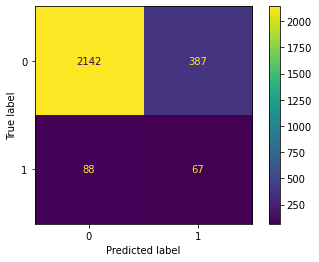

In [75]:
plot_confusion_matrix(svm_model, X_test, y_test)

In [76]:
pred = svm_model.predict(X_test)

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2529
           1       0.15      0.43      0.22       155

    accuracy                           0.82      2684
   macro avg       0.55      0.64      0.56      2684
weighted avg       0.91      0.82      0.86      2684



In [78]:
import xgboost as xgb

In [79]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',)

In [ ]:
param_grid = {'max_depth': [3, 4, 5]}

In [ ]:
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=10)

In [ ]:
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 4, 5]}, scoring='accuracy')

In [ ]:
xgb_grid_model.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [80]:
xgb_model.set_params(max_depth=5, n_jobs=-1)

XGBClassifier(max_depth=5, n_jobs=-1)

In [ ]:
min_estimators = 15
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    xgb_model.set_params(n_estimators=i)
    xgb_model.fit(X_train, y_train)
    xgb_predict = xgb_model.predict(X_test)
    error_rate[i] = 1 - accuracy_score(y_test, xgb_predict)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

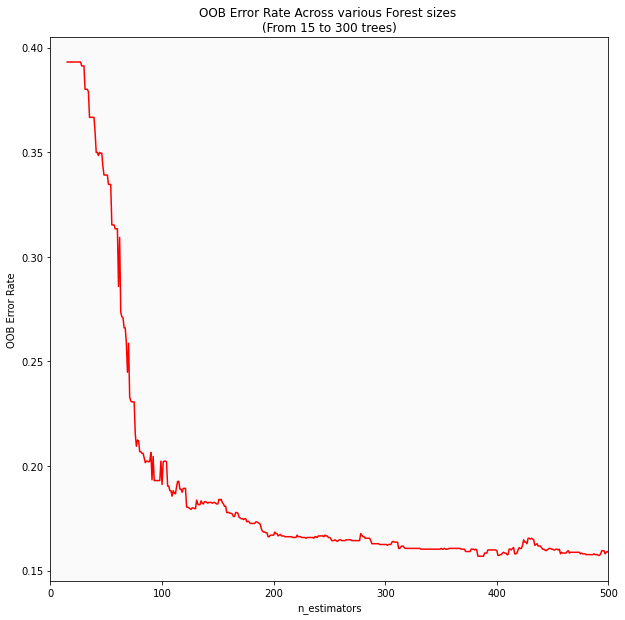

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(0, 500)
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 300 trees)')

In [81]:
xgb_model.set_params(n_estimators=200)

XGBClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [82]:
xgb_model.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=200, n_jobs=-1)

In [83]:
xgb_predict = xgb_model.predict(X_test)

In [84]:
xgb_train_predict = xgb_model.predict(X_train)

In [85]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2529
           1       0.16      0.43      0.23       155

    accuracy                           0.83      2684
   macro avg       0.56      0.64      0.57      2684
weighted avg       0.91      0.83      0.87      2684



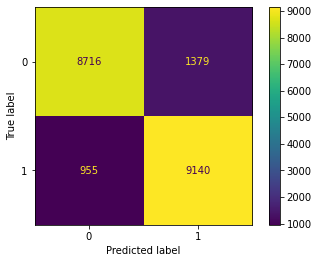

In [108]:
plot_confusion_matrix(xgb_model, X_train, y_train)

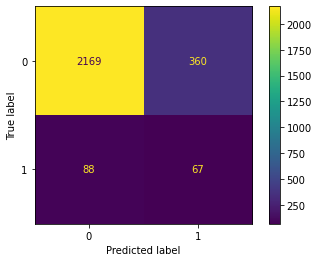

In [86]:
plot_confusion_matrix(xgb_model, X_test, y_test)

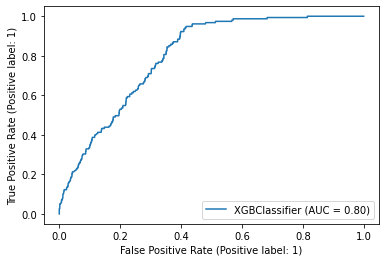

In [87]:
plot_roc_curve(xgb_model, X_test, y_test)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [136]:
model = Sequential()

model.add(Dense(200, activation='relu',))
model.add(Dropout(0.4))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(25, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [137]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [139]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=150)

Epoch 1/150
158/158 [==============================] - 2s 6ms/step - loss: 0.4972 - accuracy: 0.7207 - val_loss: 0.4180 - val_accuracy: 0.9423
Epoch 2/150
158/158 [==============================] - 1s 5ms/step - loss: 0.3755 - accuracy: 0.8125 - val_loss: 0.2943 - val_accuracy: 0.9128
Epoch 3/150
158/158 [==============================] - 1s 5ms/step - loss: 0.3182 - accuracy: 0.8316 - val_loss: 0.3082 - val_accuracy: 0.8212
Epoch 4/150
158/158 [==============================] - 1s 4ms/step - loss: 0.2902 - accuracy: 0.8394 - val_loss: 0.2945 - val_accuracy: 0.8212
Epoch 5/150
158/158 [==============================] - 1s 5ms/step - loss: 0.2762 - accuracy: 0.8536 - val_loss: 0.2891 - val_accuracy: 0.8308
Epoch 6/150
158/158 [==============================] - 1s 8ms/step - loss: 0.2720 - accuracy: 0.8543 - val_loss: 0.3001 - val_accuracy: 0.8122
Epoch 7/150
158/158 [==============================] - 1s 5ms/step - loss: 0.2715 - accuracy: 0.8591 - val_loss: 0.2724 - val_accuracy: 0.8409

In [142]:
loss_df = pd.DataFrame(model.history.history)

In [143]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.497197,0.720703,0.418019,0.942250
1,0.375465,0.812481,0.294252,0.912817
2,0.318189,0.831550,0.308225,0.821162
3,0.290166,0.839425,0.294470,0.821162
4,0.276222,0.853640,0.289075,0.830849
5,0.272037,0.854334,0.300085,0.812221
6,0.271509,0.859089,0.272431,0.840909
7,0.262881,0.864240,0.279227,0.841282
8,0.258798,0.866815,0.280931,0.831595
9,0.259379,0.866914,0.285514,0.827496


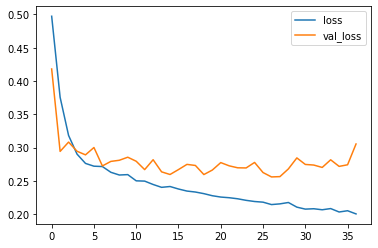

In [144]:
loss_df[['loss', 'val_loss']].plot()

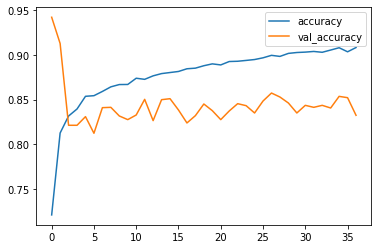

In [145]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [146]:
model.evaluate(X_test, y_test)

84/84 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8323


[0.3053818643093109, 0.8323397636413574]

In [147]:
train_predict = model.predict(X_train)

In [148]:
train_prob = np.where(train_predict >= 0.45, 1, 0)

In [149]:
confusion_matrix(y_train, train_prob)

array([[8812, 1283],
       [ 309, 9786]])

In [150]:
y_pred = model.predict(X_test)

In [151]:
pred = np.where(y_pred >= 0.45, 1, 0)

In [152]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2529
           1       0.14      0.39      0.21       155

    accuracy                           0.83      2684
   macro avg       0.55      0.62      0.55      2684
weighted avg       0.91      0.83      0.86      2684



In [153]:
confusion_matrix(y_test, pred)

array([[2160,  369],
       [  95,   60]])

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
naive_model = MultinomialNB()

In [104]:
naive_model.fit(X_train, y_train)

MultinomialNB()

In [105]:
naive_predict = naive_model.predict(X_test)

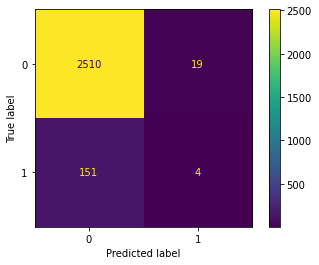

In [106]:
plot_confusion_matrix(naive_model, X_test, y_test)

In [107]:
print(classification_report(y_test, naive_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2529
           1       0.17      0.03      0.04       155

    accuracy                           0.94      2684
   macro avg       0.56      0.51      0.51      2684
weighted avg       0.90      0.94      0.91      2684



In [154]:
#XGBOOST, ANN model, Adaboost shows similar kind of performance

In [173]:
test_df = pd.read_csv('Vehicle_Insurance_Fraudulent/test.csv',)

In [174]:
test_df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
1,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
2,Aug,4,Tuesday,Ford,Urban,Monday,Aug,5,Male,Single,...,6 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Liability
3,Apr,4,Thursday,Ford,Urban,Wednesday,May,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils
4,Mar,3,Thursday,Honda,Urban,Thursday,Jun,4,Male,Married,...,5 years,26 to 30,No,No,External,more than 5,no change,1 vehicle,1994,Collision


In [175]:
test_df = test_df.drop(["Month", "Make", "DayOfWeek", "DayOfWeekClaimed", "MonthClaimed", "VehiclePrice", "Days_Policy_Accident", "AgeOfVehicle", "AgeOfPolicyHolder", "NumberOfSuppliments", "NumberOfCars", "WeekOfMonthClaimed", "RepNumber", "Deductible", "DriverRating"], axis=1)

In [176]:
test_df['WeekOfMonth']=test_df['WeekOfMonth'].astype('object')
test_df['Year']=test_df['Year'].astype('object')
test_df['Age'] = test_df['Age'].apply(func)

In [177]:
X_char_dum = pd.get_dummies(test_df, drop_first = True)
X_char_dum.shape

(2000, 39)

In [186]:
X_char_dum.columns

Index(['PolicyNumber', 'WeekOfMonth_2', 'WeekOfMonth_3', 'WeekOfMonth_4',
       'WeekOfMonth_5', 'AccidentArea_Urban', 'Sex_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widow',
       'Age_~38', 'Age_~48', 'Age_~80', 'Fault_Third Party',
       'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision',
       'PolicyType_Utility - All Perils', 'PolicyType_Utility - Collision',
       'PolicyType_Utility - Liability', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'Days_Policy_Claim_8 to 15',
       'Days_Policy_Claim_more than 30', 'PastNumberOfClaims_2 to 4',
       'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none',
       'PoliceReportFiled_Yes', 'WitnessPresent_Yes', 'AgentType_Internal',
       'AddressChange_Claim_2 to 3 years', 'AddressChange_Claim_4 to 8 years',
       'AddressChange_Claim_no change', 'AddressChange_Claim_under 6 months',
       'Y

In [187]:
X_train.columns

Index(['AccidentArea_Urban', 'Sex_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow', 'Fault_Third Party',
       'PolicyType_Sedan - Collision', 'PolicyType_Sedan - Liability',
       'PolicyType_Sport - All Perils', 'PolicyType_Sport - Collision',
       'PolicyType_Sport - Liability', 'PolicyType_Utility - All Perils',
       'PolicyType_Utility - Collision', 'PolicyType_Utility - Liability',
       'VehicleCategory_Sport', 'VehicleCategory_Utility',
       'Days_Policy_Claim_8 to 15', 'Days_Policy_Claim_more than 30',
       'Days_Policy_Claim_none', 'PastNumberOfClaims_2 to 4',
       'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none',
       'PoliceReportFiled_Yes', 'WitnessPresent_Yes', 'AgentType_Internal',
       'AddressChange_Claim_2 to 3 years', 'AddressChange_Claim_4 to 8 years',
       'AddressChange_Claim_no change', 'AddressChange_Claim_under 6 months',
       'BasePolicy_Collision', 'BasePolicy_Liability', 'Age_~38', 'Age_~48'

In [182]:
X_char_dum['PolicyType_Sport - Liability'] = 0

In [ ]:
num['Age'] = pd.qcut(num['Age'], 4, labels=['~31', '~38', '~48', '~80'], )

In [171]:
def func(col):
  if col <=31:
    return '~31'
  elif col <= 38:
    return '~38'
  elif col<= 48:
    return '~48'
  else:
    return '~80'

In [172]:
# test_df['Age'] = test_df['Age'].apply(func)

0       ~80
1       ~31
2       ~38
3       ~48
4       ~31
       ... 
1995    ~38
1996    ~38
1997    ~48
1998    ~80
1999    ~31
Name: Age, Length: 2000, dtype: object

In [188]:
X_char_dum.drop('PolicyNumber', axis=1, inplace=True)

In [192]:
X_char_dum = X_char_dum[X_train.columns]

In [193]:
pred = xgb_model.predict(X_char_dum)

In [198]:
df_final = pd.DataFrame()

In [199]:
df_final['FraudFound_P'] = pred

In [201]:
df_final.to_csv('/content/drive/MyDrive/Vehicle_Insurance_Fraudulent/Mukkesh.csv', index=False)